In [252]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [253]:
# Set the float formatting option
pd.options.display.float_format = '{:.2f}'.format

In [254]:
df= pd.read_csv('Cleaned_cars24.csv')
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.00,58.16,5.00,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.00,126.20,5.00,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.00,88.70,5.00,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.00,88.76,7.00,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.00,140.80,5.00,17.74


In [255]:
df.shape

(5809, 12)

In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5809 entries, 0 to 5808
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5809 non-null   object 
 1   Location           5809 non-null   object 
 2   Year               5809 non-null   int64  
 3   Kilometers_Driven  5809 non-null   int64  
 4   Fuel_Type          5809 non-null   object 
 5   Transmission       5809 non-null   object 
 6   Owner_Type         5809 non-null   object 
 7   Mileage            5809 non-null   float64
 8   Engine             5809 non-null   float64
 9   Power              5809 non-null   float64
 10  Seats              5809 non-null   float64
 11  Price              5809 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 544.7+ KB


In [257]:
df.drop(columns='Name',inplace=True)

In [258]:
df.Seats= df.Seats.astype('str')
df.Year= df.Year.astype('str')

In [259]:
df.describe(include='object').T

,count,unique,top,freq
Location,5809,11,Mumbai,769
Year,5809,22,2014,790
Fuel_Type,5809,4,Diesel,3104
Transmission,5809,2,Manual,4197
Owner_Type,5809,4,First,4780
Seats,5809,8,5.0,4896


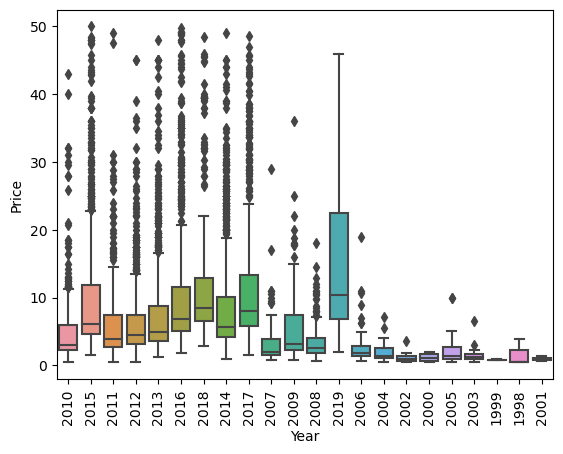

In [260]:
sns.boxplot(data=df, x=df.Year, y=df.Price )
plt.xticks(rotation=90)
#plt.xlabel('')
plt.show()

In [261]:
df['Price']= df['Price']*100000

In [262]:
pd.pivot_table(data=df, index=df.Year)

C:\Users\Vishal\AppData\Local\Temp\ipykernel_15636\3022082501.py:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  pd.pivot_table(data=df, index=df.Year)


,Engine,Kilometers_Driven,Mileage,Power,Price
Year,,,,,
1998,1260.67,81866.67,14.87,92.57,162666.67
1999,1168.00,105000.00,15.15,75.00,83500.00
2000,1817.00,112500.00,15.27,60.77,117500.00
2001,1385.50,124985.75,15.05,86.95,97500.00
2002,1319.73,78664.64,16.54,61.37,127363.64
2003,1478.07,84404.36,15.46,82.00,169785.71
2004,1532.84,94115.48,14.84,93.75,201200.00
2005,1805.07,92223.74,13.99,105.45,227720.93
2006,1692.72,101114.26,15.22,103.07,282230.77


In [263]:
for i in df.select_dtypes(include='object').columns:
    print(df[i].value_counts())
    print(i)
    print('--------------------------')

Mumbai        769
Hyderabad     713
Kochi         630
Coimbatore    604
Pune          596
Delhi         540
Kolkata       522
Chennai       471
Jaipur        403
Bangalore     342
Ahmedabad     219
Name: Location, dtype: int64
Location
--------------------------
2014    790
2015    728
2016    723
2013    644
2017    567
2012    566
2011    454
2010    333
2018    279
2009    191
2008    162
2007    107
2019     94
2006     65
2005     43
2004     25
2003     14
2002     11
2000      4
2001      4
1998      3
1999      2
Name: Year, dtype: int64
Year
--------------------------
Diesel    3104
Petrol    2640
CNG         55
LPG         10
Name: Fuel_Type, dtype: int64
Fuel_Type
--------------------------
Manual       4197
Automatic    1612
Name: Transmission, dtype: int64
Transmission
--------------------------
First             4780
Second             921
Third              101
Fourth & Above       7
Name: Owner_Type, dtype: int64
Owner_Type
--------------------------
5.0     4896
7.0   

In [264]:
df.loc[(df['Fuel_Type']=='LPG') | (df['Fuel_Type']=='CNG'), 'Fuel_Type'] = 'Gas'

In [265]:
df.drop(df[df['Fuel_Type'] == 'Gas'].index, inplace=True)

In [266]:
df.drop(df[df['Seats'] == '2.0'].index, inplace=True)
df.drop(df[df['Seats'] == '10.0'].index, inplace=True)
df.drop(df[df['Seats'] == '9.0'].index, inplace=True)

In [267]:
df.loc[(df['Owner_Type']=='Third') | (df['Owner_Type']=='Fourth & Above'), 'Owner_Type'] = 'Third & Above'

<AxesSubplot:xlabel='Owner_Type', ylabel='Price'>

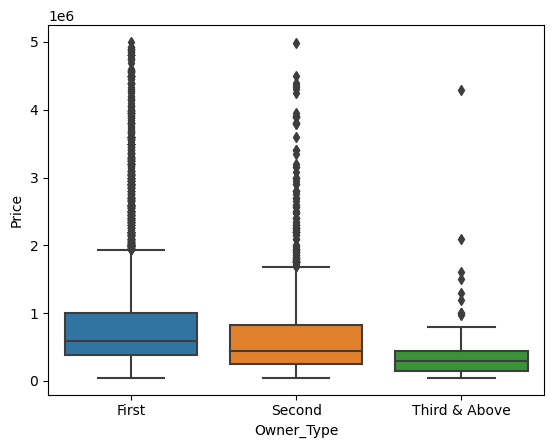

In [268]:
sns.boxplot(data=df,x='Owner_Type',y='Price')

In [269]:
df.shape

(5733, 11)

In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5733 entries, 1 to 5808
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           5733 non-null   object 
 1   Year               5733 non-null   object 
 2   Kilometers_Driven  5733 non-null   int64  
 3   Fuel_Type          5733 non-null   object 
 4   Transmission       5733 non-null   object 
 5   Owner_Type         5733 non-null   object 
 6   Mileage            5733 non-null   float64
 7   Engine             5733 non-null   float64
 8   Power              5733 non-null   float64
 9   Seats              5733 non-null   object 
 10  Price              5733 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 537.5+ KB


In [271]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.00,126.20,5.0,1250000.00
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.00,88.70,5.0,450000.00
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.00,88.76,7.0,600000.00
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.00,140.80,5.0,1774000.00
6,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.00,63.10,5.0,350000.00


## Define X,y & Encoding (LR)

In [272]:
X = df.drop(columns='Price')
y= df['Price']

In [273]:
X.drop(columns=['Engine','Seats','Year'] ,inplace=True)

In [274]:
cat_column = X.select_dtypes(include='object').columns
num_column = X.select_dtypes(exclude='object').columns

In [275]:
cat_column,num_column

(Index(['Location', 'Fuel_Type', 'Transmission', 'Owner_Type'], dtype='object'),
 Index(['Kilometers_Driven', 'Mileage', 'Power'], dtype='object'))

In [276]:
# Encoding

In [277]:
X[cat_column].head(3)

,Location,Fuel_Type,Transmission,Owner_Type
1,Pune,Diesel,Manual,First
2,Chennai,Petrol,Manual,First
3,Chennai,Diesel,Manual,First


In [278]:
encoded_cat_column = pd.get_dummies(X[cat_column], drop_first=True)

In [279]:
encoded_cat_column.head(2)

,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Second,Owner_Type_Third & Above
1,0,0,0,0,0,0,0,0,0,1,0,1,0,0
2,0,1,0,0,0,0,0,0,0,0,1,1,0,0


In [280]:
X.drop(columns=df[cat_column].columns, inplace=True)

In [281]:
X = X.join(encoded_cat_column)

In [282]:
X.head(2)

,Kilometers_Driven,Mileage,Power,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Second,Owner_Type_Third & Above
1,41000,19.67,126.20,0,0,0,0,0,0,0,0,0,1,0,1,0,0
2,46000,18.20,88.70,0,1,0,0,0,0,0,0,0,0,1,1,0,0


In [283]:
y.head(2)

1   1250000.00
2    450000.00
Name: Price, dtype: float64

In [284]:
import statsmodels.api as sm

In [285]:
Xc = sm.add_constant(X)
Xc.head(2)

,const,Kilometers_Driven,Mileage,Power,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Second,Owner_Type_Third & Above
1,1.00,41000,19.67,126.20,0,0,0,0,0,0,0,0,0,1,0,1,0,0
2,1.00,46000,18.20,88.70,0,1,0,0,0,0,0,0,0,0,1,1,0,0


In [286]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

In [287]:
vif_value=[VIF(Xc.values,i) for i in range(Xc.shape[1])]
pd.DataFrame(vif_value,columns=['VIF_Value'], index=Xc.columns)

,VIF_Value
const,136.52
Kilometers_Driven,1.31
Mileage,1.85
Power,2.68
Location_Bangalore,2.45
Location_Chennai,2.96
Location_Coimbatore,3.41
Location_Delhi,3.14
Location_Hyderabad,3.76
Location_Jaipur,2.68


In [288]:
# train_test_split

In [289]:
from sklearn.model_selection import train_test_split

In [290]:
X_train, X_test, y_train, y_test= train_test_split(Xc,y,test_size=0.3,random_state=5)

In [291]:
X_train.shape,X_test.shape

((4013, 18), (1720, 18))

# Linear Regression

In [292]:
LR = sm.OLS(y_train,X_train).fit()

In [293]:
LR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     560.7
Date:                Mon, 13 May 2024   Prob (F-statistic):               0.00
Time:                        03:43:21   Log-Likelihood:                -58097.
No. Observations:                4013   AIC:                         1.162e+05
Df Residuals:                    3995   BIC:                         1.163e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     4.913e+05   8.59e+04      5.722      0.000    3.23e+05     6.6e+05
Kilometers_Driven           -4.2686      0.217    -19.662      0.000      -4.694      -3.843
Mileage                  -4709.0686   2443.365     -1.927      0.054   -9499.426      81.289
Power                     9857.3484    242.945     40.574      0.000    9381.041    1.03e+04
Location_Bangalore        1.797e+05   4.93e+04      3.647      0.000    8.31e+04    2.76e+05
Location_Chennai          6.097e+04   4.66e+04      1.308      0.191   -3.04e+04    1.52e+05
Location_Coimbatore       3.511e+05   4.47e+04      7.848      0.000    2.63e+05    4.39e+05
Location_Delhi            1.882e+04   4.58e+04      0.411      0.681    -7.1e+04    1.09e+05
Location_Hyderabad        1.722e+05    4.4e+04      3.916      0.000     8.6e+04    2.58e+05
Location_Jaipur           9.159e+04   4.83e+04      1.896      0.058   -3120.459    1.86e+05
Location_Kochi            1.756e+05   4.47e+04      3.927      0.000    8.79e+04    2.63e+05
Location_Kolkata          -1.52e+05   4.64e+04     -3.278      0.001   -2.43e+05   -6.11e+04
Location_Mumbai           -4.82e+04   4.38e+04     -1.099      0.272   -1.34e+05    3.78e+04
Location_Pune             8.743e+04    4.5e+04      1.944      0.052    -744.780    1.76e+05
Fuel_Type_Petrol         -3.682e+05   1.81e+04    -20.380      0.000   -4.04e+05   -3.33e+05
Transmission_Manual       -3.72e+05   2.16e+04    -17.204      0.000   -4.14e+05    -3.3e+05
Owner_Type_Second        -1.667e+05   2.13e+04     -7.820      0.000   -2.08e+05   -1.25e+05
Owner_Type_Third & Above -2.829e+05   5.33e+04     -5.307      0.000   -3.87e+05   -1.78e+05
==============================================================================
Omnibus:                      914.105   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6019.303
Skew:                           0.920   Prob(JB):                         0.00
Kurtosis:                       8.711   Cond. No.                     1.26e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Performance of LR

In [294]:
LR_pred = LR.predict(X_test)

In [295]:
test_r2 = r2_score(y_test, LR_pred)
test_mse = mean_squared_error(y_test, LR_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, LR_pred)
test_mape = mean_absolute_percentage_error(y_test, LR_pred)
print('r2_score', test_r2)
print('MSE', test_mse)
print('RMSE', test_rmse)
print('MAE', test_mae)
print('MAPE', test_mape)

r2_score 0.6778690971882928
MSE 253840108133.84464
RMSE 503825.47388341196
MAE 318795.5546518247
MAPE 0.5383413348469901


## Scaling & Encoding (knn)

In [296]:
# scaling

In [297]:
from sklearn.preprocessing import StandardScaler

In [298]:
ss = StandardScaler()

In [299]:
X = df.drop(columns='Price')
y= df['Price']

In [300]:
cat_column = X.select_dtypes(include='object').columns
num_column = X.select_dtypes(exclude='object').columns

In [301]:
cat_column,num_column

(Index(['Location', 'Year', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Seats'], dtype='object'),
 Index(['Kilometers_Driven', 'Mileage', 'Engine', 'Power'], dtype='object'))

In [302]:
X.loc[:,num_column] =ss.fit_transform(X.loc[:,num_column])

In [303]:
X.head(2)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
1,Pune,2015,-0.44,Diesel,Manual,First,0.32,-0.04,0.31,5.0
2,Chennai,2011,-0.31,Petrol,Manual,First,-0.04,-0.72,-0.45,5.0


In [304]:
# Encoding

In [305]:
X[cat_column].head(3)

,Location,Year,Fuel_Type,Transmission,Owner_Type,Seats
1,Pune,2015,Diesel,Manual,First,5.0
2,Chennai,2011,Petrol,Manual,First,5.0
3,Chennai,2012,Diesel,Manual,First,7.0


In [306]:
encoded_cat_column = pd.get_dummies(X[cat_column], drop_first=True)

In [307]:
encoded_cat_column.head(2)

,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,...,Year_2018,Year_2019,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Second,Owner_Type_Third & Above,Seats_5.0,Seats_6.0,Seats_7.0,Seats_8.0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0


In [308]:
X.drop(columns=df[cat_column].columns, inplace=True)

In [309]:
X = X.join(encoded_cat_column)

In [310]:
X.head(2)

,Kilometers_Driven,Mileage,Engine,Power,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,...,Year_2018,Year_2019,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Second,Owner_Type_Third & Above,Seats_5.0,Seats_6.0,Seats_7.0,Seats_8.0
1,-0.44,0.32,-0.04,0.31,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,-0.31,-0.04,-0.72,-0.45,0,1,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0


In [311]:
y.head(2)

1   1250000.00
2    450000.00
Name: Price, dtype: float64

In [312]:
# train_test_split

In [313]:
from sklearn.model_selection import train_test_split

In [314]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=5)

In [315]:
X_train.shape,X_test.shape

((4013, 43), (1720, 43))

# KNN

In [316]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score,GridSearchCV, KFold
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [317]:
knn =KNeighborsRegressor()

In [318]:
knn.fit(X_train,y_train)

KNeighborsRegressor()

In [319]:
knn_predict = knn.predict(X_test)

In [320]:
test_r2 = r2_score(y_test, knn_predict)
test_mse = mean_squared_error(y_test, knn_predict)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, knn_predict)
test_mape = mean_absolute_percentage_error(y_test, knn_predict)
print('r2_score', test_r2)
print('MSE', test_mse)
print('RMSE', test_rmse)
print('MAE', test_mae)
print('MAPE', test_mape)

r2_score 0.8347434611226416
MSE 130222643441.86046
RMSE 360863.74636676995
MAE 196619.53488372092
MAPE 0.26806076537256623


In [321]:
kf=KFold(n_splits=3,shuffle=True,random_state=5)
knn_cv_scores = cross_val_score(knn, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')

In [322]:
rmse_avg=np.mean(np.abs(knn_cv_scores))
rmse_sd=np.std(np.abs(knn_cv_scores),ddof=1)
print('Bias_Error',rmse_avg)
print('Var_Error',rmse_sd)

Bias_Error 369715.26141453447
Var_Error 24180.210377746287


## tuning Knn

In [323]:
knn=KNeighborsRegressor()
hyp_par={'n_neighbors':np.arange(2,20),'weights':['uniform','distance']}
kf=KFold(n_splits=3,shuffle=True,random_state=5)
GS=GridSearchCV(knn,hyp_par,cv=kf,scoring='neg_root_mean_squared_error')
GS.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=5, shuffle=True),
             estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                         'weights': ['uniform', 'distance']},
             scoring='neg_root_mean_squared_error')

In [324]:
GS.best_params_

{'n_neighbors': 9, 'weights': 'distance'}

In [325]:
knn_tuned = KNeighborsRegressor(n_neighbors=10, weights='distance')

In [326]:
knn_tuned.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=10, weights='distance')

In [327]:
knn_tuned_pred = knn_tuned.predict(X_test)

In [328]:
test_r2 = r2_score(y_test, knn_tuned_pred)
test_mse = mean_squared_error(y_test, knn_tuned_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, knn_tuned_pred)
test_mape = mean_absolute_percentage_error(y_test, knn_tuned_pred)
print('r2_score', test_r2)
print('MSE', test_mse)
print('RMSE', test_rmse)
print('MAE', test_mae)
print('MAPE', test_mape)

r2_score 0.8466828135537667
MSE 120814398266.64865
RMSE 347583.65650106256
MAE 188379.89815562105
MAPE 0.2658863677730174


In [329]:
#knn_tuned = KNeighborsRegressor(n_neighbors=10, weights='distance')
cv_scores =cross_val_score(knn_tuned,X_train,y_train,cv=kf,scoring='neg_root_mean_squared_error')
rmse_avg=np.mean(np.abs(cv_scores))
rmse_sd=np.std(np.abs(cv_scores),ddof=1)
print('Bias_Error',rmse_avg)
print('Var_Error',rmse_sd)

Bias_Error 356121.44003089104
Var_Error 23863.050191380593


In [330]:
model_perf = pd.DataFrame({
    'model_name':['knn_tuned'],
    'bias_error': [rmse_avg],
    'variance_error': [rmse_sd]
})
model_perf

,model_name,bias_error,variance_error
0,knn_tuned,356121.44,23863.05


## Define X,y & Encoding

In [331]:
X = df.drop(columns='Price')
y= df['Price']

In [332]:
cat_column = X.select_dtypes(include='object').columns
num_column = X.select_dtypes(exclude='object').columns

In [333]:
cat_column,num_column

(Index(['Location', 'Year', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Seats'], dtype='object'),
 Index(['Kilometers_Driven', 'Mileage', 'Engine', 'Power'], dtype='object'))

In [334]:
# Encoding

In [335]:
X[cat_column].head(3)

,Location,Year,Fuel_Type,Transmission,Owner_Type,Seats
1,Pune,2015,Diesel,Manual,First,5.0
2,Chennai,2011,Petrol,Manual,First,5.0
3,Chennai,2012,Diesel,Manual,First,7.0


In [336]:
encoded_cat_column = pd.get_dummies(X[cat_column], drop_first=True)

In [337]:
encoded_cat_column.head(2)

,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,...,Year_2018,Year_2019,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Second,Owner_Type_Third & Above,Seats_5.0,Seats_6.0,Seats_7.0,Seats_8.0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0


In [338]:
X.drop(columns=df[cat_column].columns, inplace=True)

In [339]:
X = X.join(encoded_cat_column)

In [340]:
X.head(2)

,Kilometers_Driven,Mileage,Engine,Power,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,...,Year_2018,Year_2019,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Second,Owner_Type_Third & Above,Seats_5.0,Seats_6.0,Seats_7.0,Seats_8.0
1,41000,19.67,1582.00,126.20,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,46000,18.20,1199.00,88.70,0,1,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0


In [341]:
y.head(2)

1   1250000.00
2    450000.00
Name: Price, dtype: float64

In [342]:
# train_test_split

In [343]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=5)

In [344]:
X_train.shape,X_test.shape

((4013, 43), (1720, 43))

# RandomForestRegressor

In [345]:
from sklearn.ensemble import RandomForestRegressor

In [346]:
random_forest = RandomForestRegressor(random_state=5)

In [347]:
random_forest.fit(X_train, y_train)

RandomForestRegressor(random_state=5)

In [348]:
RF_pred = random_forest.predict(X_test)

In [349]:
test_r2 = r2_score(y_test, RF_pred)
test_mse = mean_squared_error(y_test, RF_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, RF_pred)
test_mape = mean_absolute_percentage_error(y_test, RF_pred)
print('r2_score', test_r2)
print('MSE', test_mse)
print('RMSE', test_rmse)
print('MAE', test_mae)
print('MAPE', test_mape)

r2_score 0.8689854868839998
MSE 103239825444.21645
RMSE 321309.5477016151
MAE 159093.20319767442
MAPE 0.21138618588459082


In [350]:
# Tuning Random Forest

In [351]:
kf=KFold(n_splits=3,shuffle=True,random_state=5)

In [380]:
param_grid = {
    'n_estimators': [69, 100,140, 150,153],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(random_forest, param_grid, cv=kf, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=5, shuffle=True),
             estimator=RandomForestRegressor(n_estimators=17, random_state=5),
             n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [69, 100, 140, 150, 153]},
             scoring='neg_root_mean_squared_error')

In [381]:
grid_search.best_estimator_

RandomForestRegressor(n_estimators=150, random_state=5)

In [358]:
random_forest = RandomForestRegressor(n_estimators= 150, random_state=5)

In [359]:
random_forest.fit(X_train, y_train)

RandomForestRegressor(n_estimators=150, random_state=5)

### Custom Tuning of Random Forest

In [382]:
RF_bias=[]
RF_var=[]
for n in np.arange(1,75):
    RF=RandomForestRegressor(criterion='squared_error',n_estimators=n,random_state=5)
    kf=KFold(n_splits=3,shuffle=True,random_state=5)
    scores=cross_val_score(RF,X_train,y_train,cv=kf,scoring='neg_mean_squared_error')
    rmse=np.sqrt(np.abs(scores))
    RF_bias.append(np.mean(rmse))
    RF_var.append(np.std(rmse,ddof=1))

In [383]:
RF_bias,RF_var

([467122.6623163717,
  395780.66987139895,
  356936.8611049405,
  350972.6086983784,
  340513.16089528945,
  335539.05972747796,
  332758.7163172272,
  327260.43310120073,
  328030.87368215,
  325930.7473913489,
  327085.86615318625,
  327089.6618407266,
  328290.47183229146,
  327533.9653207319,
  328720.0840121989,
  327214.87181326345,
  326176.3121392664,
  327401.85816188186,
  326899.02105509327,
  326367.740063747,
  325638.4438445954,
  324979.57086626743,
  325389.50489307655,
  324604.3216999821,
  324750.60219607165,
  325400.6087871332,
  324464.9727870795,
  324066.99801027594,
  323409.57233917044,
  323679.0201023381,
  324139.67206034315,
  324849.68384436454,
  324375.81347330025,
  323567.81704494444,
  323400.97763889766,
  323954.68218051136,
  323750.3600574998,
  322802.6403748929,
  323020.73241179506,
  322749.91303975816,
  322592.18256652536,
  322733.1588103948,
  322580.2237690862,
  322441.274865846,
  322358.93019879033,
  322107.4652137102,
  322213.37976

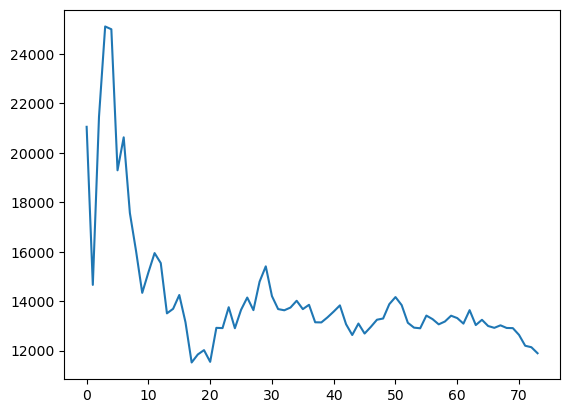

In [384]:
x_axis=np.arange(len(RF_var))
plt.plot(x_axis,RF_var)

In [386]:
np.argmin(RF_var),np.min(RF_var),RF_bias[17]

(17, 11517.685486505949, 327401.85816188186)

In [387]:
tuned_random_forest = RandomForestRegressor(n_estimators= 17, random_state=5)

In [374]:
tuned_random_forest.fit(X_train, y_train)

RandomForestRegressor(n_estimators=17, random_state=5)

In [376]:
tuned_RF_pred = tuned_random_forest.predict(X_test)

In [377]:
test_r2 = r2_score(y_test, tuned_RF_pred)
test_mse = mean_squared_error(y_test, tuned_RF_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, tuned_RF_pred)
test_mape = mean_absolute_percentage_error(y_test, tuned_RF_pred)
print('r2_score', test_r2)
print('MSE', test_mse)
print('RMSE', test_rmse)
print('MAE', test_mae)
print('MAPE', test_mape)

r2_score 0.8671223905600571
MSE 104707950880.81824
RMSE 323586.07955352194
MAE 161264.6230701583
MAPE 0.21571558671647728


In [389]:
kf=KFold(n_splits=3,shuffle=True,random_state=5)
cv_score =cross_val_score(tuned_random_forest,X_train,y_train,cv=kf,scoring='neg_root_mean_squared_error')
rmse_avg=np.mean(np.abs(cv_score))
rmse_sd=np.std(np.abs(cv_score),ddof=1)
print('Bias_Error',rmse_avg)
print('Var_Error',rmse_sd)

Bias_Error 326176.3121392664
Var_Error 13146.945925837852


In [398]:
RF_perf = pd.DataFrame({
    'model_name': ['Tuned_RF'],
    'bias_error': [rmse_avg], 
    'variance_error': [rmse_sd]})

In [399]:
#model_perf.append(RF_perf, ignore_index=True)
pd.concat([model_perf, RF_perf], ignore_index=True)

,model_name,bias_error,variance_error
0,knn_tuned,356121.44,23863.05
1,Tuned_RF,326176.31,13146.95
